<a href="https://colab.research.google.com/github/jaehyun-ko/COR1010/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EC%9D%B4%ED%84%B0%EB%9F%AC%EB%B8%94%EC%9D%98_for%EB%AC%B8%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%A0%91%EA%B7%BC_%EB%B0%A9%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 이터러블의 for문을 이용한 접근 방법
- 파이썬은 리스트, 튜플과 같이 개별 원소를 반복적으로 셀 수 있는 객체(이터러블, =iterable) 를 제공합니다.
- 이터러블은 반복을 편리하게 구현하기 위해서 만들어진 개념이라고 할 수 있습니다.
- 이터러블 객체를 for문을 사용하여 순회하는 방법은 세 가지가 있습니다.
    1. 개별 원소를 직접 접근하는 방법
    2. 원소의 위치(인덱스, index)를 넘겨주어 개별 원소에 접근하는 방법
    3. `enumerate()`를 이용하여 1번과 2번을 동시에 사용하는 방법
- 이 노트북에서는 1번과 2번의 두 가지 방법에 대해 알아봅니다.

## 0. 필요 라이브러리 import 및 seed 고정
- 넘파이 어레이를 만들기 위한 라이브러리를 import 합니다.
- 직접 실행해보실 때 실험 결과가 동일하게 출력되도록 난수 생성 함수의 인자를 고정합니다. 

In [1]:
# 라이브러리 import
import numpy as np
import random

# 난수 생성 함수의 인자를 고정
np.random.seed(0)
random.seed(0)

- 본 노트북에서는 과제에 대한 직접적인 설명을 피하기 위해 numpy에서 제공하는 `np.random.randint()` 를 이용해서 `[20, 2]` 크기의 랜덤 어레이를 생성하도록 하겠습니다.

In [5]:
numbers = np.random.randint(1, 5, [20, 2])
print(numbers)

[[4 3]
 [3 4]
 [1 1]
 [1 2]
 [3 1]
 [2 3]
 [4 3]
 [3 4]
 [2 1]
 [1 1]
 [4 4]
 [1 3]
 [3 1]
 [1 4]
 [1 2]
 [3 1]
 [1 4]
 [2 4]
 [1 3]
 [2 2]]


In [6]:
print(numbers.shape)

(20, 2)


## 1. 개별 원소를 직접 접근하는 방법
다음과 같이 작성하면 개별 원소에 직접 접근할 수 있습니다.
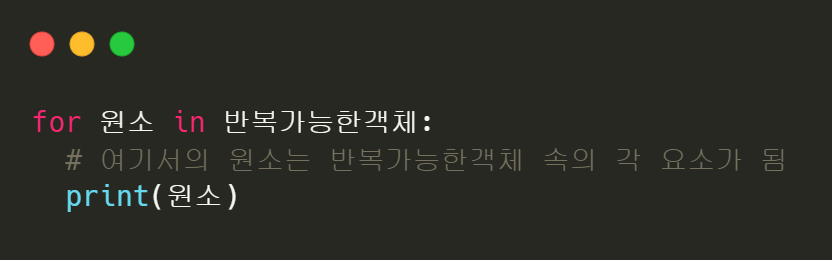


In [9]:
# 방금 생성한 numbers의 요소가 차례로 출력되는 것을 확인할 수 있음
# 출력 결과의 바깥 [] 이 없음을 확인할 것
for nums in numbers:
    print(nums)

[4 3]
[3 4]
[1 1]
[1 2]
[3 1]
[2 3]
[4 3]
[3 4]
[2 1]
[1 1]
[4 4]
[1 3]
[3 1]
[1 4]
[1 2]
[3 1]
[1 4]
[2 4]
[1 3]
[2 2]


nums의 각 요소에 접근하고 싶으면 다음과 같이 접근하면 됩니다.

In [10]:
# numbers의 요소인 nums의, 각 요소에 접근
for nums in numbers:
    print(nums[0])
    print(nums[1])

4
3
3
4
1
1
1
2
3
1
2
3
4
3
3
4
2
1
1
1
4
4
1
3
3
1
1
4
1
2
3
1
1
4
2
4
1
3
2
2


- 요소의 값을 바꾸기 위해서는 반복문에서 각 요소별로 바꾸고 싶은 값을 할당해주면 되겠죠.
- 여기에서는 첫번째 행에는 1을, 두번째 행에는 2를 할당하도록 하겠습니다.

In [12]:
for nums in numbers:
    nums[0] = 1
    nums[1] = 2
print(numbers)

[[1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]]


## 2.원소의 위치(인덱스, index)를 넘겨주어 개별 원소에 접근하는 방법

- 1번 항복에서 numbers의 값을 변경하였으므로, numbers를 재할당 하겠습니다.

In [13]:
numbers = np.random.randint(1, 5, [20, 2])
print(numbers)

[[2 4]
 [1 1]
 [1 2]
 [2 3]
 [2 1]
 [1 2]
 [3 2]
 [2 4]
 [2 1]
 [1 1]
 [4 4]
 [2 3]
 [2 4]
 [2 4]
 [1 1]
 [4 2]
 [3 1]
 [3 4]
 [4 3]
 [4 2]]


1번에서 살펴본 내용을 다시 생각해 봅시다.
- for 문은 `for 원소 in 반복가능한객체:` 꼴로 쓰임
-`반복가능한객체` 속의 내용물을 순서대로 `원소`에 대입함.  

그렇다면, `반복가능한객체` 위치에 시퀀스의 길이만큼의 인덱스 번호 시퀀스를 넘겨준다면 시퀀스 속의 내용물을 반복가능하다는 것을 알 수 있습니다.  
이를 위한 것이 `range(시작, 끝+1, 뛰어넘을 수)` 입니다.


In [14]:
# range는 시작 번호부터 시작해서 끝이 나올 때까지 1씩 증가시키며 이어진 수를 생성
print(list(range(1, 10)))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [19]:
# range의 시작 원소가 없으면 0부터 시작
print(list(range(10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [15]:
# 뛰어넘을 수는 기본으로 1이지만 인자로 넘겨주었을 경우 해당 크기만큼 뛰어넘음
print(list(range(1, 10, 2)))

[1, 3, 5, 7, 9]


`numpy array`의 길이는 어떻게 알 수 있을까요?  
`numpy array`는 크기가 변할 때마다 크기를 측정하여 `shape` 속성에 튜플 형태로 저장합니다.

In [17]:
numbers.shape

(20, 2)

그렇다면, shape 속성의 0번째 원소가 `numpy array` 의 행의 수가 되겠네요.

In [18]:
numbers.shape[0]

20

이제 행의 수를 알았으니, 각 행에 접근하기만 하면 되겠네요.
- 인덱스는 0부터 시작
- 1씩 증가시키며
- `numbers.shape[0]-1` 번째 인덱스까지 접근해야 함

이는 range와 완벽히 같은 특성인 것을 알 수 있습니다.

In [20]:
for index in range(numbers.shape[0]):
    print(numbers[index])

[2 4]
[1 1]
[1 2]
[2 3]
[2 1]
[1 2]
[3 2]
[2 4]
[2 1]
[1 1]
[4 4]
[2 3]
[2 4]
[2 4]
[1 1]
[4 2]
[3 1]
[3 4]
[4 3]
[4 2]


1번과 마찬가지로,
요소의 값을 바꾸기 위해서는 반복문에서 각 요소별로 바꾸고 싶은 값을 할당해주면 되겠죠.  

여기에서는 첫번째 행에는 1을, 두번째 행에는 2를 할당하도록 하겠습니다.

In [22]:
for index in range(numbers.shape[0]):
    numbers[index,0] = 1
    numbers[index,1] = 2
print(numbers)

[[1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]]
